# CMSE 201 Project 1
-----
# @author : Aman Dhruva Thamminana


## Determining an efficient soultion to the traveling salesmen problem.

# Motavitation 

During me tenure as a student and a curious enthusiast I have been exposed to a lot of problems. One of the once that I have been exposed to the early once's is the traveling salesman problem.

Recently, I’ve seen an article that states that UPS drivers take rides whenever possible as they have discovered that this would be more efficient in terms of time, energy, and safety. (Harward Business Review) this is pretty intresting a very similar plrm to the traveling salesman problem.

This problem also seems very intuitive to the human eye as drawing efficient route between the nodes looks easy. But verifying it is difficult. In this case, we have to brute force, and check all the possibilities to find out the most efficient route. We will further discuss a potential solution in finding a local minimum within reasonable amount of time. 

# Methodology


Import statements

In [1]:
import math
import time  
import itertools
import unittest
import random

from sortedcontainers import SortedList


import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import display, clear_output


The following is the code for the basic primitive of the graph data struct

The node is basic class holding the x and y of the class along with its name.

The Graph is a collection of nodes inside the dict stucture

In [2]:

class Node:
    """Node is the primitive class representing the nodes in the graph
    """
    def __init__(self, x: float , y: float, name: str):
        """
        Constructor for the Node class
        
        :param x: X location of the node
        :param y: Y location of the node
        :param name: Name of the node
        """
        self.x = x
        self.y = y
        self.name = name

    def __str__(self):
        """node name magic function for the string

        :return: the node name of the string
        """
        return f"( {self.x} \| {self.y} )"

    def get(self):
        """getter for the function

        :return: tupple of (x, y) cals
        """
        return self.x,  self.y

class Graphs:
    """Class for the Graph Data Structure which hold the nodes and the connections between them

    """
    #Master Clas
    # s
    def __init__(self, fullyConnected = True):
        """the Graph Class Constructor

        :param fullyConnected: Checked if you want the graph to hold fully connected nodes, defaults to True
        """

        # Initialize the nodes
        self.nodes = {}

        # Initialize the connections
        self.connections = {}

        # Initialize the fully connected flag
        self.fullyConnected = fullyConnected

        

    def __len__(self):
        """ Magic function for the length of the graph

        :return: Length of the graph
        """
        return len(self.nodes)
        

    def addPoints(self, name: str, x: float, y: float):
        """ Adds a point to the graph
        
        :return: adds points to the graph
        """

        self.nodes[name] = Node(x, y, name)
        if name not in self.connections:
            self.connections[name] = set()

        if self.fullyConnected:
            for node_name in self.nodes:
                if node_name != name:
                    self.ConnectPoints(node_name, name)

    def ConnectPoints(self, node1 : str, node2 : str, addBoth:bool = True):
        """Connects two points in the graph

        :param node1: Start Node to connect From
        :param node2: End Node to connect To
        :param addBoth: add both ways, defaults to True
        :raises Exception: If the node1 is not in the graph
        :raises Exception: If the node2 is not in the graph
        """
        
        # adds a connection from node 1 to node 2.(assuiming both is False)
        # by default adds node from the other side as well 
        if (node1 not in self.nodes):
            raise Exception(f"{node1} node not in graph")

        if (node2 not in self.nodes):
            raise Exception(f"{node2} node not in graph")

        self.connections[node1].add(node2)
        if addBoth: self.connections[node2].add(node1)
        
    def GetXYList(self, seq):
        """Returns the x and y values of the nodes in the sequence

        :param seq: Sequence of the nodes
        :raises Exception: if a node is not in the graph
        :return: a tupple of (xvals, yvals) for the nodes in the sequence where xvals and yvals are lists
        """
        xvals = []
        yvals = []
        for i in seq:
            if i not in self.nodes:
                raise Exception("not in the nodes list")

            x, y = self.nodes[i].get()
            xvals.append(x)
            yvals.append(y)
        return xvals, yvals


    def plotPoints(self):
        """Plots the points in the graph
        """
        xvals = []
        yvals = []
        for i in self.nodes:
            x, y = self.nodes[i].get()
            xvals.append(x)
            yvals.append(y)
        # plt.scatter(xvals, yvals)
        plt.plot(xvals, yvals, 'bo-')


    def plotPointsSeq(self, seq, seq2 = None, wait = 0.01):
        """_summary_

        :param seq: _description_
        :param wait: _description_, defaults to 0.01
        :raises Exception: _description_
        """
        xvals = []
        yvals = []
        for i in seq:
            if i not in self.nodes:
                raise Exception("not in the nodes list")

            x, y = self.nodes[i].get()
            xvals.append(x)
            yvals.append(y)
        # plt.scatter(xvals, yvals)
        self.fig = plt.figure(figsize=(7,7))
        
        plt.plot(xvals, yvals, 'bo-')
        if seq2 is not None:
            xvals2 = []
            yvals2 = []
            for i in seq2:
                if i not in self.nodes:
                    raise Exception("not in the nodes list")

                x, y = self.nodes[i].get()
                xvals2.append(x)
                yvals2.append(y)
            plt.plot(xvals2, yvals2, 'ro-')
        plt.xlabel("X")
        plt.ylabel("Y")
        
        plt.title("Route")
        
        FootNotes = "sequence : "  + str(seq) + "  Cost :" + str(self.GetCost(seq))
        
        plt.figtext(0.5, 0.01, FootNotes, ha="center")
        
        plt.show()

 

    def GetNodeNames(self)->list:
        """ Returns the list of the node names in the class
        """
        return list(self.nodes.keys())


    def distanceBetween(self, node1, node2):
        """returns the distance between two nodes

        :param node1: Distance from node1
        :param node2: Distance to node2
        :return: euclidean distance between the two nodes
        """
        x1, y1 = self.nodes[node1].get()

        x2, y2 = self.nodes[node2].get()

        return ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        

    def printNodes(self):
        """prints all the nodes in the graph
        """
        for i in self.nodes:
            print(i, self.nodes[i])


    def GetCost(self, seq):
        """returns the cost of the sequence

        :param seq: Sequence of the nodes to find the cost of
        :raises Exception: if a node is not in the connections
        :return: cost of the sequence
        """
        curr = seq[0]
        cost = 0
        for i in range(1,len(seq)):
            if seq[i] in self.connections[curr]:
                cost += self.distanceBetween(curr, seq[i])
            else:
                raise Exception("not in the connections")
            curr = seq[i]
        return round(cost, 3)

    def addRandomPoints(self, numberOfPoints = 10,seed=None):
        """adds random points to the graph

        :param numberOfPoints: number of points to add, defaults to 10
        :param seed: seed of the random, defaults to None
        """
        if seed is not None:
            random.seed(seed)

        for i in range(numberOfPoints):
            x = random.randint(0, 100)
            y = random.randint(0, 100)
            self.addPoints(str(i), x, y)


    def reset(self):
        """resets the internal data
        """
        # str to a node class
        self.nodes = {}

        # str to a set of str
        self.connections = {}




## Testing the Graph

In [3]:
Graph1 = Graphs()
Graph1.addPoints('a' , 5, 1)
Graph1.addPoints('b' , 5, 7)
Graph1.addPoints('c' , 2, 3)

# Unit test to check the points are added
assert(len(Graph1) == 3)
assert(len(Graph1.GetNodeNames()) == 3)

# check the distance between the points is correct
assert(Graph1.GetCost(['a', 'b', 'c']) == 11.0)

del Graph1

# Defining the problem!


## What is the Traveling Salemen Problem?

TSP is a problem that asks to compute a route with the smallest traveling distance given a list of cities going thru them only once

It is considered as a NP-hard problem(i.e Difficult to compute in a reasonable amount of time.) 

### How long does it take to compute the shortest path?

Lets Create a graph and add some nodes to it

In [4]:
graph1 = Graphs()
graph1.addRandomPoints(10, 72) # we are adding 10 random points to the 

seq = graph1.GetNodeNames()

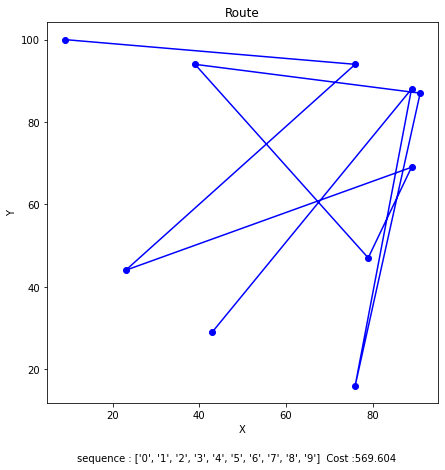

In [5]:
graph1.plotPointsSeq(seq) # plots the points in the graph

In [6]:
graph1.GetCost(seq) # this is the cost of the sequence

569.604

Now We can brute force the problem by computing all the possible routes and then finding the shortest one

In [7]:
# Finding the minimium using bruteforce
mincost = 2**32
minseq = ""

sequenceCost = []
bestSequenceCost = []

for out in itertools.permutations(seq, len(seq)):
    currcost = graph1.GetCost(out)
    if mincost > currcost:
        mincost = currcost
        minseq = out
        bestSequenceCost.append(mincost)
    sequenceCost.append(currcost)
    
temp = sequenceCost.pop(0)


this computation is very expensive and is not feasible for large number of nodes and as seen in the graph above takes a lot of time

In [8]:
minseq, mincost
# this is the cost of the sequence when brute force is used

(('0', '5', '1', '8', '6', '3', '4', '7', '9', '2'), 218.038)

Above we can see the most efficient route for the given graph

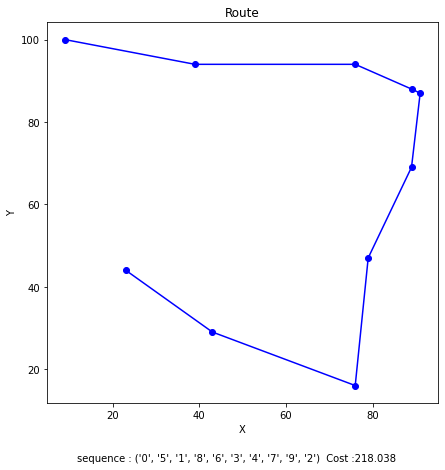

In [9]:
graph1.plotPointsSeq(minseq)

we can also see the itterations and best Solution such itteration

Text(0.5, 1.0, 'Cost of the sequence over the iterations')

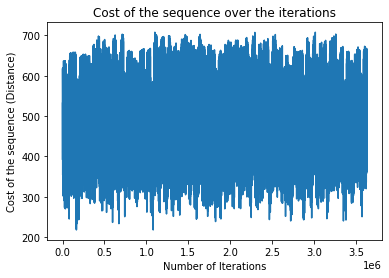

In [10]:
plt.plot(list(range(0, len(sequenceCost))), sequenceCost, label="Sequence Cost")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost of the sequence (Distance)")
plt.title("Cost of the sequence over the iterations")


#### verification

Text(0.5, 1.0, 'Best Sequence Cost over the iterations')

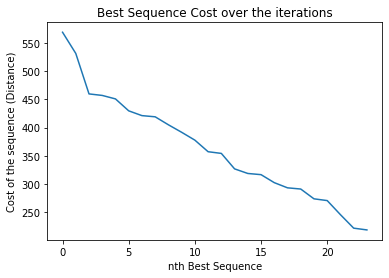

In [11]:
plt.plot(list(range(0, len(bestSequenceCost))), bestSequenceCost, label="Best Sequence Cost")
plt.xlabel("nth Best Sequence")
plt.ylabel("Cost of the sequence (Distance)")
plt.title("Best Sequence Cost over the iterations")

They by we known that the brute force method is finding the lowest cost path but it is very expensive to compute

in the following we can create a function can run bruteforce for n Nodes

In [12]:
def ComputeBruteForceTime(n = 5, seed = None, reset = False, addNodes = False, graph1 = None):
    """Computes the time taken to compute the brute force

    :param n: the number of nodes, defaults to 5
    :param seed: the seed for random, defaults to None
    :param reset: reset the current graph?, defaults to False
    :param addNodes: whether to add nodes or use the current ones, defaults to False
    :param graph1: the graph object, defaults to None
    :return: tuple of (minseq, mincost, graph1) where minseq is the sequence of the nodes, mincost is the cost of the sequence and graph1 is the graph object
    """
    
    # initializing the graph with nodes if not already passed (or can be reset)
    if not graph1:
        graph1 = Graphs()
        graph1.addRandomPoints(n, seed)
    if reset:
        graph1.reset()
    if addNodes:
        graph1.addRandomPoints(n, seed)


    # gets the initial sequence
    seq = graph1.GetNodeNames()
    
    # used to compute lowest costs
    mincost = 2**32
    minseq = ""
    for out in itertools.permutations(seq, len(seq)):
        currcost = graph1.GetCost(out)
        if mincost > currcost:
            mincost = currcost
            minseq = out

    return minseq, mincost, graph1



Running it on several trials we can see that the time taken to compute the shortest path over several sequences

In [13]:
trialsTime = []

trials = 3

# timing the brute force algorithm
for i in range(trials):
    start = time.time()
    print(ComputeBruteForceTime(10))
    
    end = time.time()
    trialsTime.append(end-start)

# printing the average time taken
np.average(trialsTime)

(('5', '2', '1', '3', '4', '0', '9', '8', '6', '7'), 195.689, <__main__.Graphs object at 0x7fb85e40c7c0>)
(('5', '7', '4', '2', '0', '6', '8', '1', '3', '9'), 192.004, <__main__.Graphs object at 0x7fb85e40c7c0>)
(('5', '1', '2', '8', '3', '0', '4', '9', '7', '6'), 216.153, <__main__.Graphs object at 0x7fb85e40c7c0>)


47.88603528340658

using this we can deduce that as the number of node increase the time it takes to compute the most efficient soultion grows in the form of a factorial there by

10 nodes = 10! permuatations = 60 sec

11 nodes = 11!/10! * 60 sec = 660 sec

15 nodes = 15!/10! * 60 sec = 360360 min

20 nodes = 20!/10! * 60 sec = 670442572800 mins = 1274729.81 years

25 nodes = 25!/10! * 60 sec = 590.20 Lifetimes of the universe to compute the most effiecient solution


Text(0, 0.5, 'operations')

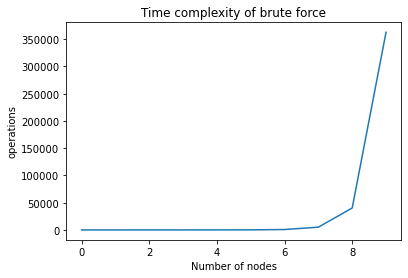

In [14]:
nodes_x = np.arange(0,10)

y_vals = []

for i in nodes_x:
    y_vals.append(math.factorial(i))

plt.title("Time complexity of brute force")
plt.plot(nodes_x, y_vals )
plt.xlabel("Number of nodes")
plt.ylabel("operations")

This adds up really fast Like really fast as the compexity of is in the order of (n!)

## My Approach

Using random genetic model to find a reasonable solution to the problem

Using a more efficient approach to solve this problem.


But before that lets understand graphs.

graphs are a collection of nodes and edges as shown in the class code above
in this case we are assuming that the edges are undirected(fully connected) and have a weight of their euclidean distance. 




Lets use a genetic algorithm to find a reasonable solution to the problem

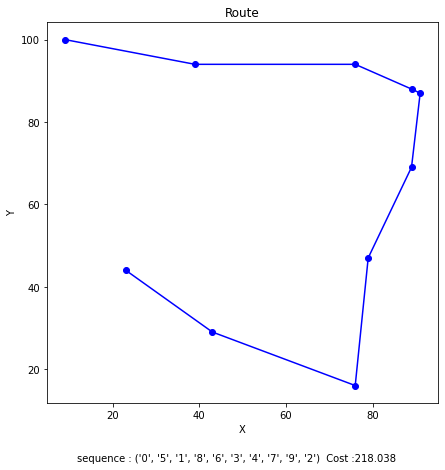

(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
 ('0', '5', '1', '8', '6', '3', '4', '7', '9', '2'))

In [15]:
graph1 = Graphs()
minseqBruteForce, mincost, graph1 = ComputeBruteForceTime(n = 10, seed = 72, graph1=graph1, addNodes=True)

graph1.plotPointsSeq(minseqBruteForce)
graph1.GetNodeNames(), minseqBruteForce


we computed the best route using the brute force method.

Lets Initialize the gentic algorithm.

In [16]:
def CheapestSequence(outvals):
    """finds the cheapest sequence in a list of sequences

    :param outvals: list of sequences
    :return: a tuple of (minseq, mincost) where minseq is the sequence of the nodes and mincost is the cost of the sequence
    """
    mincost = 2**32
    minseq1 = []
    for out in outvals:
        currcost = graph1.GetCost(out)
        if mincost > currcost:
            mincost = currcost
            minseq1 = out

    return (minseq1, mincost)

In [17]:
def tournaments(numberOfPlayers, numberOfGenerations, nodePath, bestElites = 4):
    """torunaments between the players where the players are shuffled paths of sequences

    :param numberOfPlayers: number of players in the tournament which are number of random paths
    :param numberOfGenerations: number of generations to run the tournament
    :param nodePath: the orginal sequential path of the nodes
    :param bestElites: the number of elite that get to move on to the next generation, defaults to 4
    :return: lastgeneration, bestOfAllChecpest, (bestOfAllChecpestCost, bestOfAllChecpestPath)
    """
    
    # the cost of the best sequence in the tournament 
    ItterCost = []
    
    # initilize the tournament
    Tournament = []
    
    # sorted list to hold the positions of the players in the tournament
    # we can later use this to pick the best players in the town
    topPicks = SortedList()

    # add the players to the tournament with random paths(by shuffling the nodePath)
    for _ in range(numberOfPlayers):
        # makes a deep copy of the nodePath
        path = nodePath[:]
        
        # random shuffle the path
        np.random.shuffle(path)
        # adds the path to the tournament
        Tournament.append(path[:])
        
        # adds the path and its cost to the sorted container
        cost = graph1.GetCost(path[:])
        topPicks.add((cost, path[:]))
        
    # prev is the previous generation
    prev = Tournament[:]
    # newData is the new generation
    newData = Tournament[:]
    # best is the best path in the tournament
    lastBest = nodePath
    
    # main loop that runs for numberOfGenerations
    for _ in range(numberOfGenerations):
        # new container to hold the best players for the next tournament
        topPicks_temp = SortedList()
        
        # gets the plauer prime for the next tournament
        for i in range(numberOfPlayers):
            # only adds the top elites to the next contest
            if (i < bestElites):
                Bestdata = topPicks.pop(index=0)
                topPicks_temp.add(Bestdata)
                newData[i] = Bestdata[1]
                continue


            # get two random players from the contest
            p1, p2 = random.randint(0, len(Tournament)-1), random.randint(0, len(Tournament)-1)

            # get the cost of the players that are going to be in the contest
            p1_cost = graph1.GetCost(prev[p1])
            p2_cost = graph1.GetCost(prev[p2])
            write_cost = -50
            dataBest = ["0"]
            
            # condition to check which player has the best cost
            if p1_cost < p2_cost:
                newData[i] = randomMutation(prev[p1][:])
                write_cost = p1_cost
                dataBest = prev[p1][:]
            elif p1_cost > p2_cost:
                newData[i] = randomMutation(prev[p2][:])
                write_cost = p2_cost
                dataBest = prev[p2][:]
            else:
                # randomly pick one of the players if they have the same cost
                tempv = random.randint(0,1)
                if tempv:
                    write_cost = p1_cost
                    newData[i] = randomMutation(prev[p1][:])
                    dataBest = prev[p1][:]
                else:
                    write_cost = p2_cost
                    newData[i] = randomMutation(prev[p2][:])
                    dataBest = prev[p2][:]
                    

            # add the player to the next tournament
            topPicks_temp.add((write_cost, dataBest))

        # copy the new generation to the previous generation
        prev = newData[:]

        # adds the best of the generation to the list of bests
        ItterCost.append(topPicks_temp[0][0])
        
        # assigns the best of the generation to the best of all time
        lastBest = topPicks_temp[0][1]
        
        # resets the sorted container to the new generation
        topPicks = topPicks_temp
    
    print(topPicks_temp[0])
    return newData, ItterCost, lastBest

In [18]:
def randomMutation(seq):
    """randomMutation where there is a random swap of two elements in the sequence

    :param seq: sequence to be mutated
    :return: new sequence
    """

    n = 5
    # randomly pick two indexes
    index1 = random.randint(0, len(seq)-1)
    index2 = random.randint(0, len(seq)-1)
    
    # tries to make sure that the two indexes are not the same (at least 5 tries)
    while(n > 0 and index1 == index2):
        index1 = random.randint(0, len(seq)-1)
        index2 = random.randint(0, len(seq)-1)
    
    # swap the two elements
    seq[index1], seq[index2] = seq[index2], seq[index1]
    return seq

    # n = 5
    # index1 = random.randint(1, len(seq) - 2)
    # index2 = random.randint(1, len(seq) - 2)
    # while(n > 0 and index1 == index2):
    #     index1 = random.randint(1, len(seq) - 2)
    #     index2 = random.randint(1, len(seq) - 2)

now we can run this algorithm for a number of generations and see what we get

In [19]:

graph1 = Graphs()
graph1.addRandomPoints(10, 72)
seq = graph1.GetNodeNames()
outvals, CostSeq, seqVal = tournaments(300, 200, seq, bestElites=5)

(218.038, ['2', '9', '7', '4', '3', '6', '8', '1', '5', '0'])


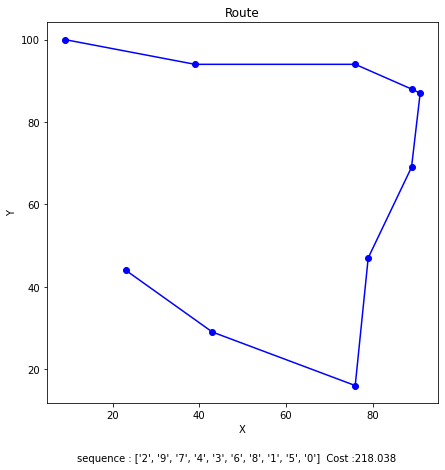

In [20]:
graph1.plotPointsSeq(seqVal)

we can run this over more generations to see if we can optimize it more

In [21]:
seq = graph1.GetNodeNames()
outvals, CostSeq, seqVal = tournaments(500, 200, seq, bestElites=13)

(218.038, ['2', '9', '7', '4', '3', '6', '8', '1', '5', '0'])


in this case we ran the algorithm for 200 generations and 500 population size and the cost of 218

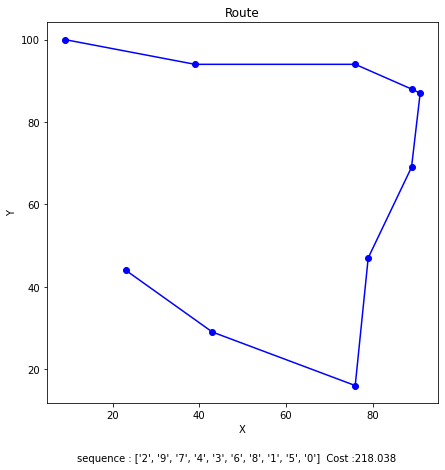

In [22]:
graph1.plotPointsSeq(seqVal)

Given above is the path that the algorithm found

graph1.plotPointsSeq(seqVal, )

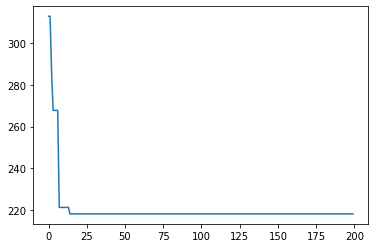

In [23]:
plt.plot(list(range(0, len(CostSeq))), CostSeq)

The CostSeq shows the best cost of the path at each generation

In [24]:
minseq1,mincost = CheapestSequence(outvals)
minseq1,mincost

(['2', '9', '7', '4', '3', '6', '8', '1', '5', '0'], 218.038)

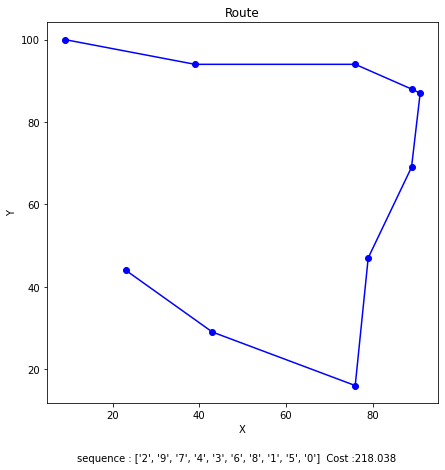

In [25]:
graph1.plotPointsSeq(minseq1)

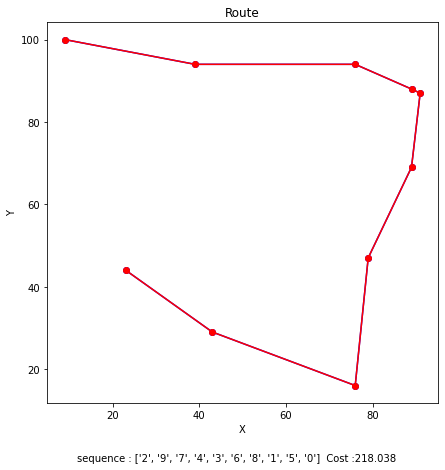

In [28]:

graph1.plotPointsSeq(minseq1,minseqBruteForce )
TempGraph = graph1
minseq_10G = minseq1
minseq_10B = minseqBruteForce

in the above graph we can see the path that the algorithm found is equal to the brute force method within less than quater of the time

Now that we can observe that the algorithm is working we can run it for a larger number of nodes to see how it performs.

Although running this brute force method is not feasible for large number of nodes we can run the genetic algorithm for a large number of nodes

In [29]:

graph1.reset()

graph1 = Graphs()
graph1.addRandomPoints(15, 72)
np.random.seed(100)
random.seed(100)
seq = graph1.GetNodeNames()
print(seq)
outvals, CostSeq, seqVal = tournaments(2000, 200, seq)

minseq_15G = seqVal


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
(303.312, ['10', '9', '2', '0', '5', '1', '8', '6', '3', '4', '12', '7', '11', '13', '14'])


In [30]:
minseq1,mincost = CheapestSequence(outvals)
minseq1,mincost

(['10',
  '9',
  '2',
  '0',
  '5',
  '1',
  '8',
  '6',
  '3',
  '4',
  '12',
  '7',
  '11',
  '13',
  '14'],
 303.312)

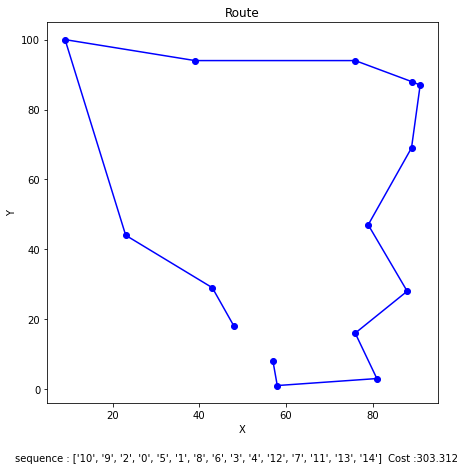

In [31]:
graph1.plotPointsSeq(minseq1)

It is important to note that the genetic algorithm is not finding the most efficient solution but a reasonable solution.

There is not a relatively efficient way to verify the solution but we can observe that the ouptut has safe choices by not picking nodes across. 

In [32]:
graph1.reset()

graph1 = Graphs()
# in this case we can see if running the tournament for more generations will give us a better result
graph1.addRandomPoints(17, 72)
np.random.seed(100)
random.seed(100)
seq = graph1.GetNodeNames()
print(seq)
outvals, CostSeq, seqVal = tournaments(2000, 600, seq)
# print(outvals)
minseq_17G = seqVal

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
(325.251, ['14', '10', '9', '2', '16', '0', '5', '1', '8', '6', '3', '4', '15', '12', '7', '11', '13'])


In [33]:
minseq1,mincost = CheapestSequence(outvals)
minseq1,mincost

(['14',
  '10',
  '9',
  '2',
  '16',
  '0',
  '5',
  '1',
  '8',
  '6',
  '3',
  '4',
  '15',
  '12',
  '7',
  '11',
  '13'],
 325.251)

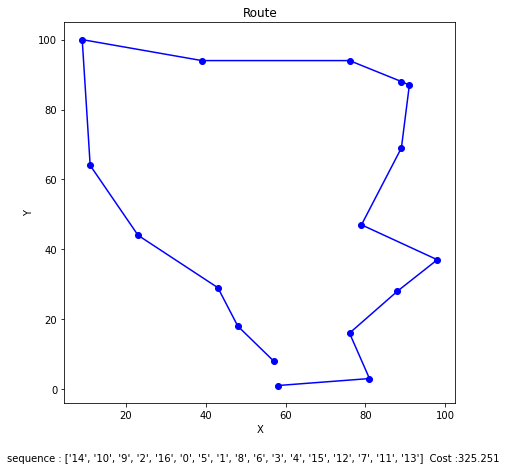

In [34]:
graph1.plotPointsSeq(minseq1)

In [35]:

graph1.reset()
# we are trying to see if again with more nodes.
graph1 = Graphs()

graph1.addRandomPoints(20, 72)
np.random.seed(100)
random.seed(100)
seq = graph1.GetNodeNames()
print(seq)
outvals, CostSeq1, seqVal1 = tournaments(1500, 600, seq)
# print(outvals)

minseq_20G = seqVal1

outvals, CostSeq2, seqVal2 = tournaments(1500, 600, seq, bestElites=40)

minseq_20G_40 = seqVal2



['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
(311.831, ['1', '8', '6', '3', '4', '15', '12', '7', '11', '13', '14', '10', '9', '19', '2', '18', '16', '0', '5', '17'])
(311.831, ['16', '18', '2', '19', '9', '10', '14', '13', '11', '7', '12', '15', '4', '3', '6', '8', '1', '17', '5', '0'])


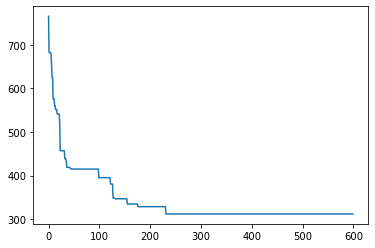

In [36]:
plt.plot(list(range(0, len(CostSeq1))), CostSeq1)

This graph is for 1500 players in 600 generations with 4 elites

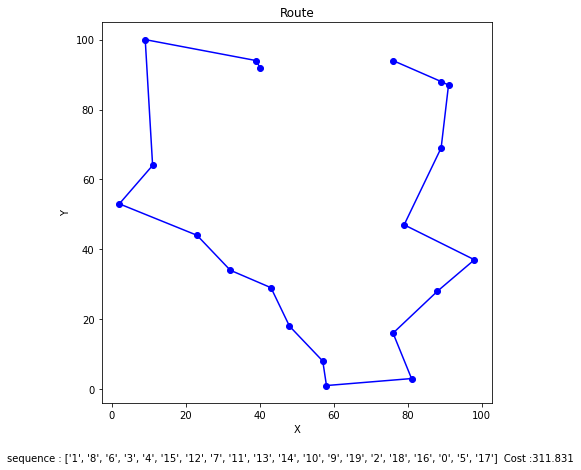

In [37]:
graph1.plotPointsSeq(seqVal1)


This graph is for 1500 players in 600 generations with 40 elites

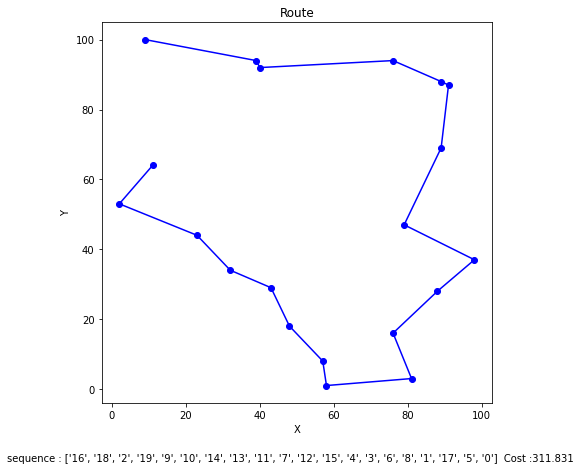

In [38]:
graph1.plotPointsSeq(seqVal2)

We can make an obsevation that the algorithm is finding an efficient solution but not the most efficient solution is not known unless brute force is used.

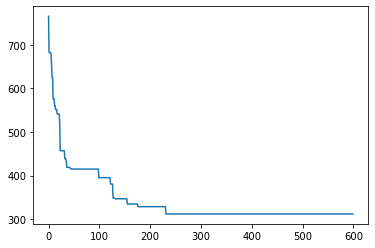

In [39]:
plt.plot(list(range(0, len(CostSeq1))), CostSeq1)

Text(0.5, 1.0, 'Cost vs Generation for my genetic algorithm')

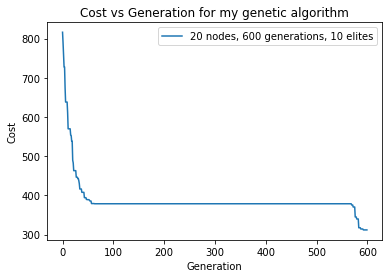

In [40]:
plt.plot(list(range(0, len(CostSeq2))), CostSeq2)
plt.legend(['20 nodes, 600 generations, 10 elites', '20 nodes, 600 generations, 40 elites'])
plt.xlabel('Generation')
plt.ylabel('Cost')
plt.title('Cost vs Generation for my genetic algorithm')


This example we can see that it does not hit the local mininium until close to 600 generations

# Verification

Using this we can see that as the generations span increases the cost of the path decreases.
cutting the cost quickly in the first few generations and then slowly decreasing the cost. acting as a verification that the algorithm is working in optimizing the path's cost.

# Results

when i carried out my method I found that the genetic algorithm was able to find a reasonable solution to the problem in a reasonable amount of time.

Text(0, 0.5, 'Cost')

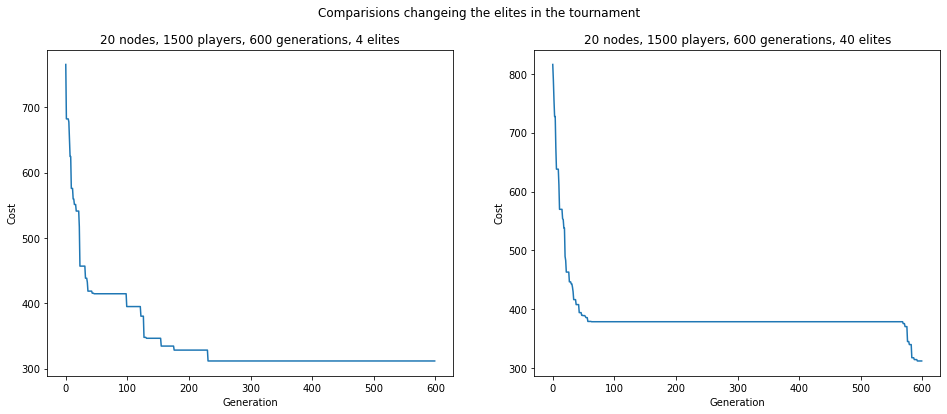

In [41]:
plt.figure(figsize=(16,6))
plt.suptitle("Comparisions changeing the elites in the tournament")
plt.subplot(1,2,1)
plt.plot(list(range(0, len(CostSeq1))), CostSeq1)
plt.title('20 nodes, 1500 players, 600 generations, 4 elites')
plt.xlabel('Generation')
plt.ylabel('Cost')

plt.subplot(1,2,2)
plt.plot(list(range(0, len(CostSeq2))), CostSeq2)
plt.title('20 nodes, 1500 players, 600 generations, 40 elites')
plt.xlabel('Generation')
plt.ylabel('Cost')

for this we can see that the algorithm is able to finds the most efficient solution in a fraction of the time compared to the brute force method.

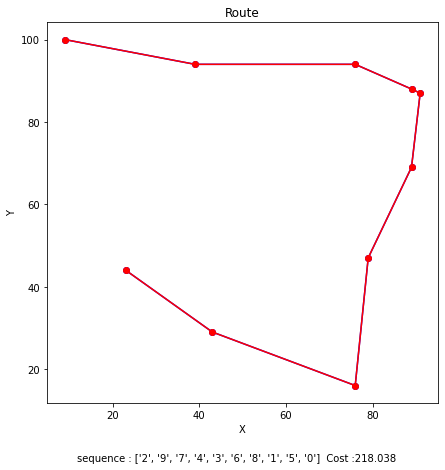

# Synthesis 

The genetic algorithm that i developed was able to find a reasonable solution to the problem in a reasonable amount of time. we have seen from the verification that the algorithm finds a local minimum in a reasonable amount of time and settles down for the solutions.

Things that can be done differently:
- Introducing different shuffles in the middle of the algorithm might help explore more of the solution space and find a better solution. 
- using other methods to find the cost of the path such as using the nearest neighbor method.
- using branch and bound method to find the most efficient solution.
- It might also any of these methods and then use genetic algorithm to find a reasonable solution to the problem.




There are certain many applications including in network routing, logistics, and scheduling, and in the design of computer hardware and software.

Sources and Acknowledgment used to complete this project:

- https://en.wikipedia.org/wiki/Travelling_salesman_problem
- https://jupyter.brynmawr.edu/services/public/dblank/jupyter.cs/FLAIRS-2015/TSPv3.ipynb
- https://hbr.org/2014/04/ever-notice-that-ups-trucks-rarely-make-left-turns
